# PROJECT 5- Credit Card Customer Segmentation
## Aaron Coteff 1.16.2021
### GreatLearning AI/ML
#### Objective- To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

In [ ]:
# Please run this notebook cell-by-cell. I experienced matplotlib artists' placements appearing in previously
# plotted graphs when I run the whole kernel all at once.

### Installation and Importation of Necessary Libraries and Packages

In [1]:
!pip3 install ipympl

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

#%matplotlib auto
%matplotlib inline
%matplotlib notebook

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn import set_config
set_config(print_changed_only=False)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

### Read the Dataset

In [3]:
cc_raw_data = pd.read_excel('Credit Card Customer Data.xlsx')

### Exploratory Data Analysis

In [4]:
cc_raw_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
cc_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
cc_raw_data.shape

(660, 7)

In [7]:
cc_raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
cc_raw_data.isnull().any()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [9]:
cc_raw_data.duplicated().any()

False

In [10]:
cc_raw_data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

#### 'Customer Key' & 'Sl_No' features unexpectedly different. 

In [11]:
cc_raw_data[cc_raw_data['Customer Key'].duplicated(keep = False) == True]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


#### There appears to be duplicated 'Customer Key' values. 

In [12]:
cks = cc_raw_data['Customer Key'].unique()
np.sort(cks)

array([11265, 11398, 11412, 11466, 11562, 11596, 11602, 11698, 11734,
       11799, 11937, 12026, 12122, 12456, 12663, 13140, 13215, 13315,
       13720, 13999, 14248, 14263, 14309, 14377, 14398, 14439, 14816,
       14854, 14916, 14946, 15086, 15129, 15310, 15318, 15546, 15585,
       15798, 16180, 16253, 16374, 16418, 16577, 16676, 16715, 17036,
       17165, 17325, 17341, 17377, 17382, 17538, 17565, 17649, 17703,
       17933, 17937, 18007, 18086, 18145, 18397, 18514, 18519, 18564,
       18595, 18609, 18821, 18916, 19137, 19215, 19785, 20043, 20072,
       20119, 20337, 20524, 20570, 20593, 20620, 21233, 21531, 21717,
       21976, 22348, 22610, 22824, 22842, 22919, 23102, 23110, 23302,
       23409, 23743, 23768, 23881, 24001, 24054, 24702, 24748, 24808,
       24980, 24998, 25084, 25321, 25330, 25440, 25742, 26063, 26089,
       26334, 26493, 26599, 26604, 26678, 26767, 27101, 27117, 27120,
       27212, 27408, 27476, 27824, 28208, 28254, 28408, 28414, 28525,
       28701, 28842,

#### These values do not exhibit periodicity. Without more information there's no way to identify the duplicates as errors or valid imputations so they will be kept.

#### We keep all rows of data and drop uninteresting features.

In [13]:
cc_data = cc_raw_data.drop(columns = ['Sl_No', 'Customer Key'])

#### All customers have credit cards.

In [14]:
cc_data[cc_data['Total_Credit_Cards'] == 0].sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Univariate Analysis of Features

In [15]:
descriptions = {
    'Avg_Credit_Limit' : 'Average credit limit across all the credit cards',
    'Total_Credit_Cards' : 'Total number of credit cards',
    'Total_visits_bank' : 'Total number of bank visits',
    'Total_visits_online' : 'Total number of online visits',
    'Total_calls_made' : 'Total number of calls made by the customer',
}

analysis = {
    'Avg_Credit_Limit' : 'Right Skewed. Numerous Outliers.',
    'Total_Credit_Cards' : 'Left Skewed. Potentially Overlapping Gaussians. No Outliers.',
    'Total_visits_bank' : 'Right Skewed. Potentially Overlapping Gaussians. No Outliers.',
    'Total_visits_online' : 'Right Skewed. Numerous Outliers.',
    'Total_calls_made' : 'Right Skewed. Potentially Overlapping Gaussians. No Outliers.',
}


*************************************

We are not concerned with outliers in the data or how normal the distributions of the data are.

*************************************

Attribute:

	 Avg_Credit_Limit :	 Average credit limit across all the credit cards 

Univariate Analysis:

	 Right Skewed. Numerous Outliers. 



<IPython.core.display.Javascript object>


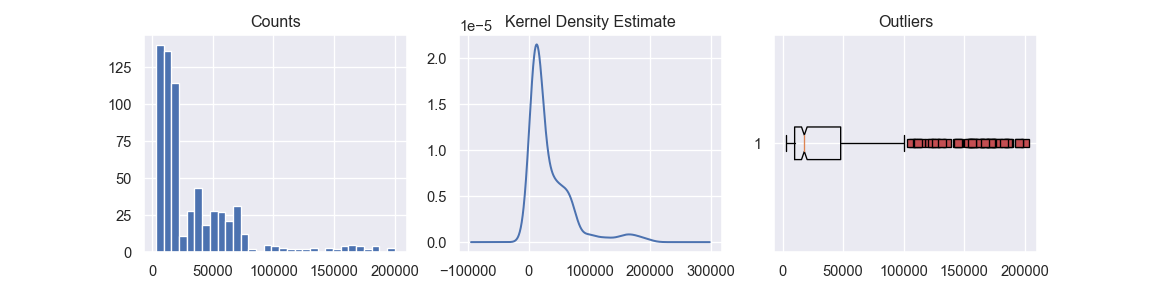


Value Ranges:
	 3000 - 200000 

Median Value:
	 18000.0 

Mean Value:
	 34574.24

Quantile Values: 
	 Q1: 10000.0 
	 Q2/Median: 18000.0 
	 Q3: 48000.0 
	 IQR: 38000.00

Standard Deviation:
	 37625.49

*************************************

Attribute:

	 Total_Credit_Cards :	 Total number of credit cards 

Univariate Analysis:

	 Left Skewed. Potentially Overlapping Gaussians. No Outliers. 



<IPython.core.display.Javascript object>


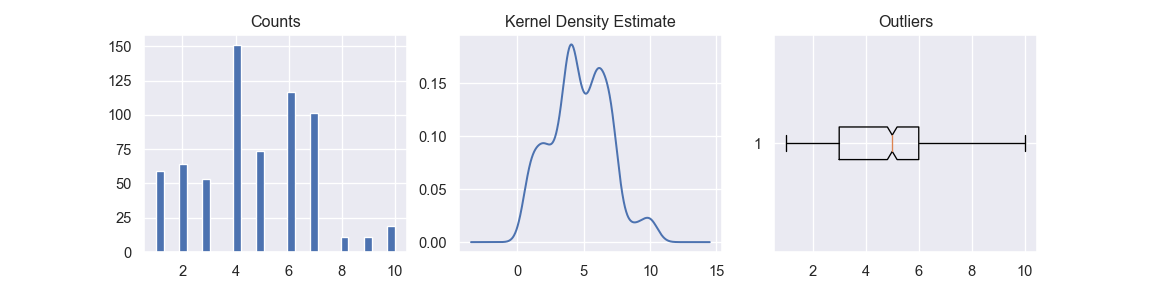


Value Ranges:
	 1 - 10 

Median Value:
	 5.0 

Mean Value:
	 4.71

Quantile Values: 
	 Q1: 3.0 
	 Q2/Median: 5.0 
	 Q3: 6.0 
	 IQR: 3.00

Standard Deviation:
	 2.17

*************************************

Attribute:

	 Total_visits_bank :	 Total number of bank visits 

Univariate Analysis:

	 Right Skewed. Potentially Overlapping Gaussians. No Outliers. 



<IPython.core.display.Javascript object>


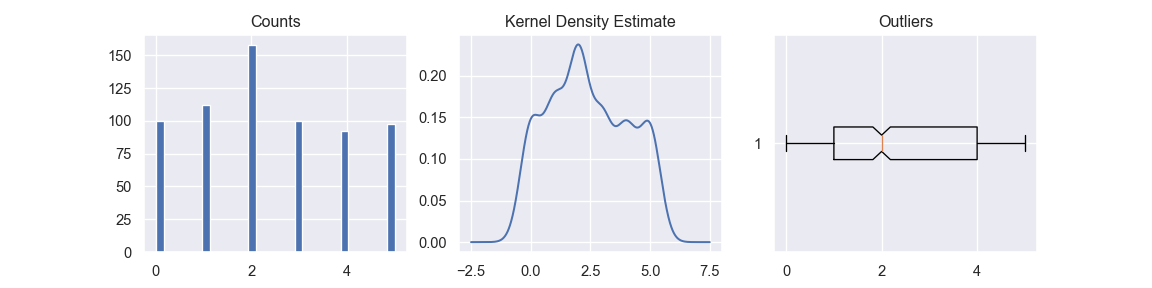


Value Ranges:
	 0 - 5 

Median Value:
	 2.0 

Mean Value:
	 2.40

Quantile Values: 
	 Q1: 1.0 
	 Q2/Median: 2.0 
	 Q3: 4.0 
	 IQR: 3.00

Standard Deviation:
	 1.63

*************************************

Attribute:

	 Total_visits_online :	 Total number of online visits 

Univariate Analysis:

	 Right Skewed. Numerous Outliers. 



<IPython.core.display.Javascript object>


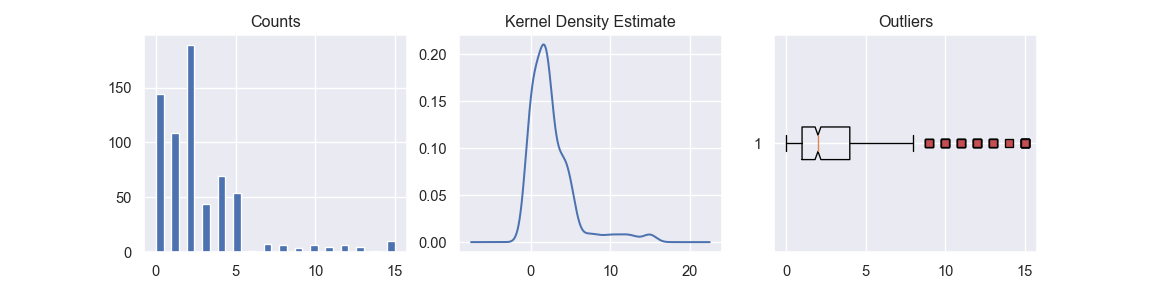


Value Ranges:
	 0 - 15 

Median Value:
	 2.0 

Mean Value:
	 2.61

Quantile Values: 
	 Q1: 1.0 
	 Q2/Median: 2.0 
	 Q3: 4.0 
	 IQR: 3.00

Standard Deviation:
	 2.94

*************************************

Attribute:

	 Total_calls_made :	 Total number of calls made by the customer 

Univariate Analysis:

	 Right Skewed. Potentially Overlapping Gaussians. No Outliers. 



<IPython.core.display.Javascript object>


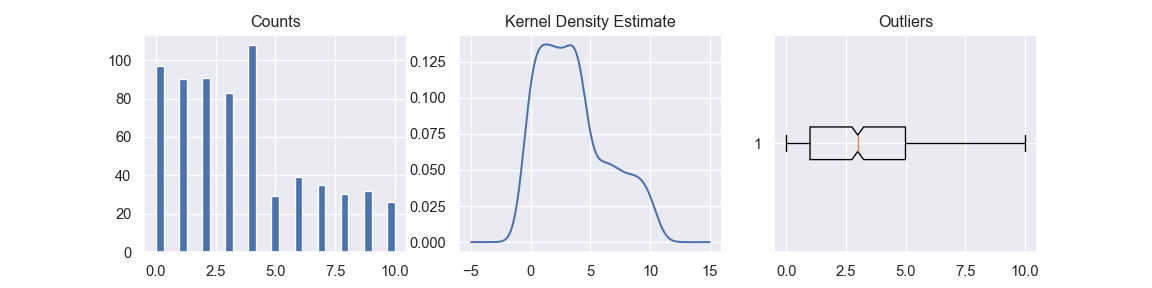


Value Ranges:
	 0 - 10 

Median Value:
	 3.0 

Mean Value:
	 3.58

Quantile Values: 
	 Q1: 1.0 
	 Q2/Median: 3.0 
	 Q3: 5.0 
	 IQR: 4.00

Standard Deviation:
	 2.87

*************************************



In [16]:
print()
print('*************************************')
print()
print('We are not concerned with outliers in the data or how normal the distributions of the data are.')
print()
print('*************************************')
print()

## UNIVARIATE ANALYSIS LOOP
for i in cc_data.columns:
    print('Attribute:\n\n\t', i, ':\t', descriptions[i], '\n')
    print('Univariate Analysis:\n\n\t', analysis[i], '\n')
## PLOTS    
    plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.hist(cc_data[i], bins = 31)
    plt.title('Counts')
    plt.grid(True)
    plt.subplot(132)
    cc_data[i].plot(kind = 'kde')
    plt.ylabel('')
    plt.title('Kernel Density Estimate')
    plt.subplot(133)
    red_square = dict(markerfacecolor='r', marker='s')
    plt.boxplot(cc_data[i], vert = False, notch = True, flierprops = red_square)
    plt.title('Outliers')
    plt.grid(True)
    plt.show()
### VALUES
    print('\nValue Ranges:\n\t', cc_data[i].min(), '-', cc_data[i].max(), '\n')
    print('Median Value:\n\t', cc_data[i].median(), '\n')
    print(f'Mean Value:\n\t {cc_data[i].mean():.2f}\n')
    print('Quantile Values:','\n\t Q1:', cc_data[i].quantile(.25),'\n\t Q2/Median:', cc_data[i].quantile(.5), '\n\t Q3:', cc_data[i].quantile(.75),
      f'\n\t IQR: {cc_data[i].quantile(.75)-cc_data[i].quantile(.25):.2f}\n')
    print(f'Standard Deviation:\n\t {cc_data[i].std():.2f}')
    print()
    print('*************************************')
    print()

#### Correlation Between Features

In [17]:
cc_data.corr(method = 'kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393034,0.082167,-0.078739,-0.326996
Total_Credit_Cards,0.393034,1.000000,0.296640,-0.242907,-0.492532
Total_visits_bank,0.082167,0.296640,1.000000,-0.512982,-0.373968
Total_visits_online,-0.078739,-0.242907,-0.512982,1.000000,0.310855
Total_calls_made,-0.326996,-0.492532,-0.373968,0.310855,1.000000


#### At most, we see potential for a range of between 3-5 Gaussians looking at an individual kde curve above. We see this below along the diagonal.

<IPython.core.display.Javascript object>


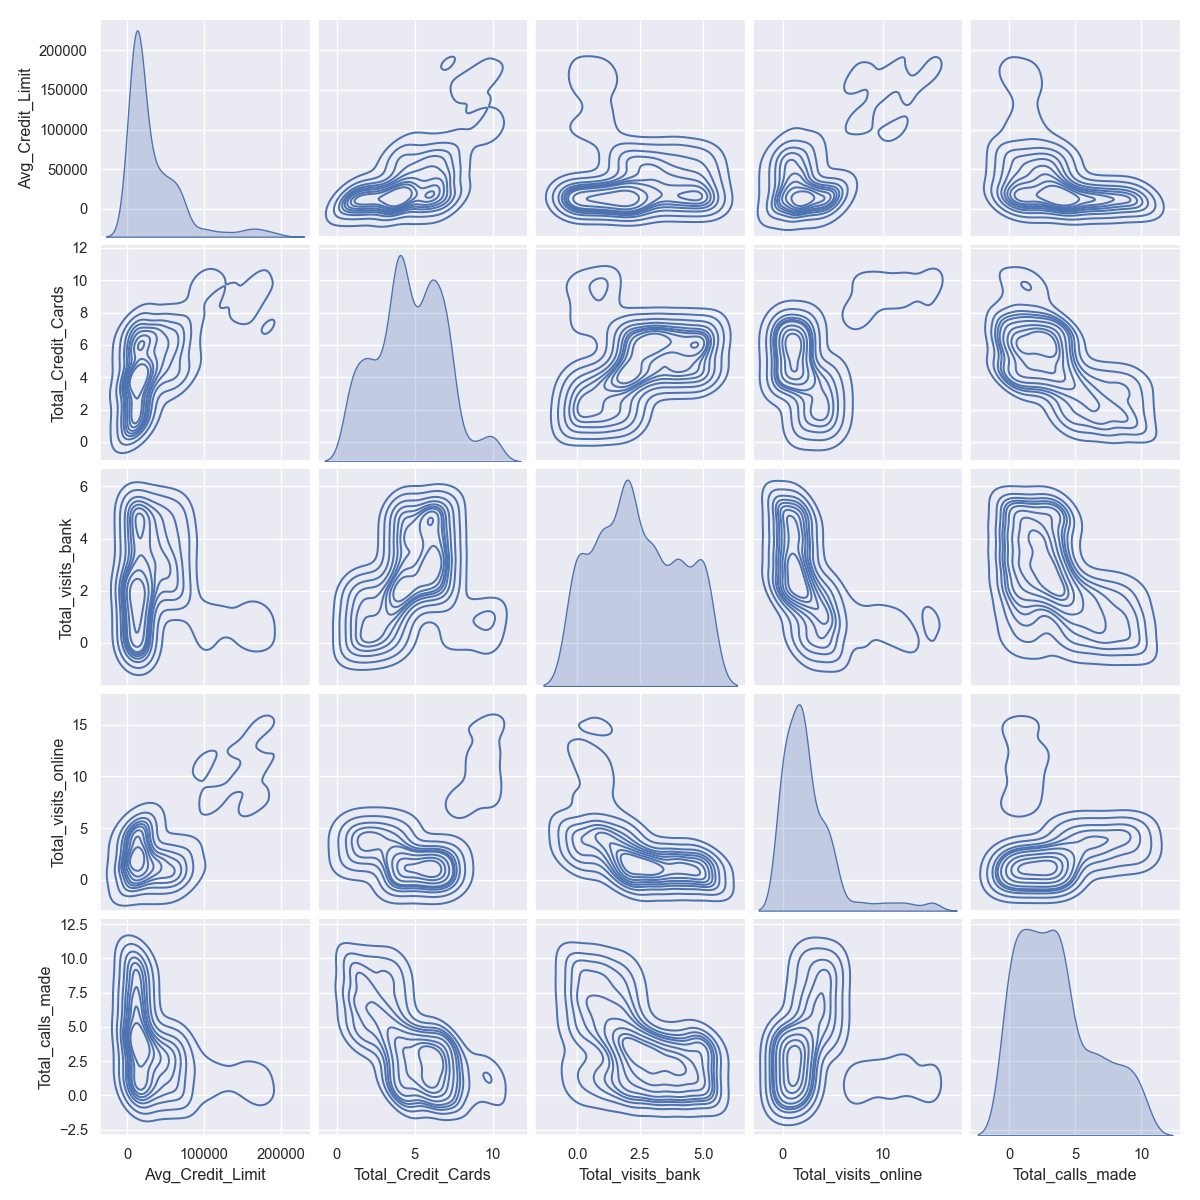

In [18]:
sns.pairplot(data = cc_data, kind = 'kde');

### Plotting the data in 3 dimensions, with Bank/Online Visits & Calls represented spatially, Credit Limit represented in the size of each, and Number of Credit Cards represented in different colors, we see 3 distinct clusters take shape.


<IPython.core.display.Javascript object>


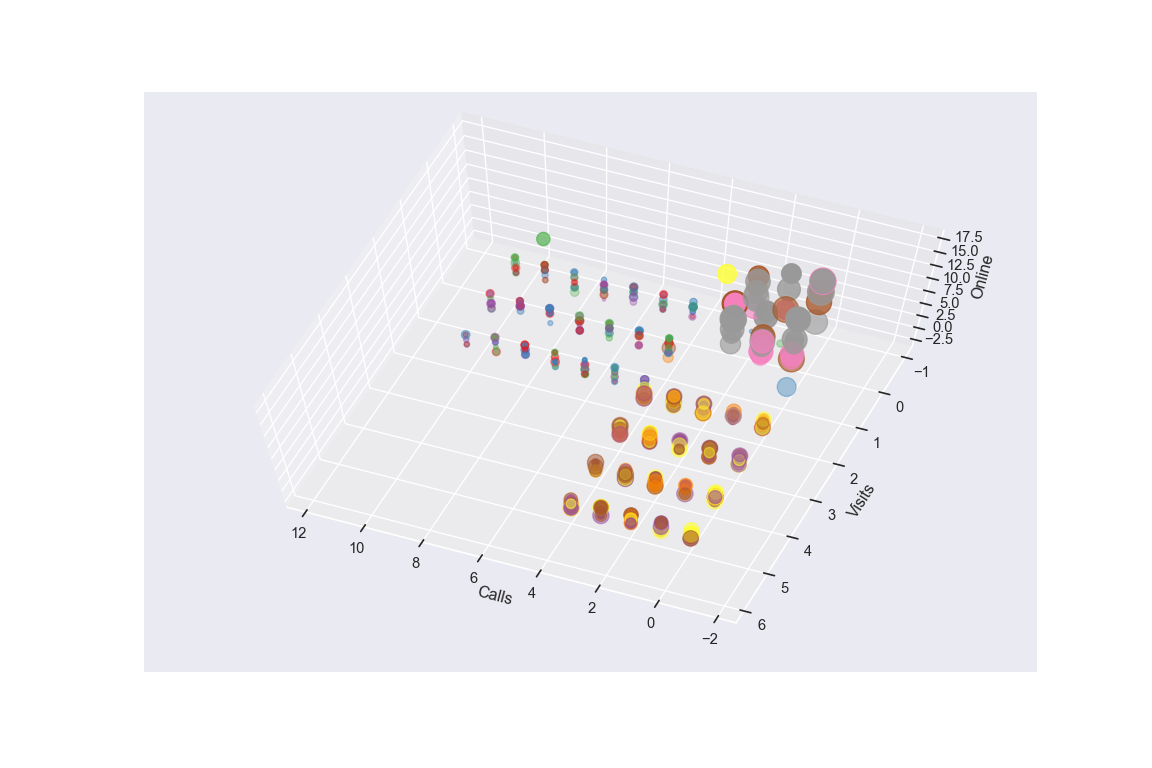

In [81]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')

x = cc_data['Total_calls_made']
y = cc_data['Total_visits_bank']
z = cc_data['Total_visits_online']

ax.set_xlabel('Calls')
ax.set_ylabel('Visits')
ax.set_zlabel('Online')

ax.scatter(x,y,z, s = [cc_data['Avg_Credit_Limit']/500], c = cc_data['Total_Credit_Cards'], cmap = 'Set1');

### K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

#### Scaling Of The Data

In [21]:
cc_data_scaled = cc_data.apply(zscore)

In [22]:
%matplotlib auto

Using matplotlib backend: nbAgg


#### Exploration Of Best Number Of Clusters

<IPython.core.display.Javascript object>


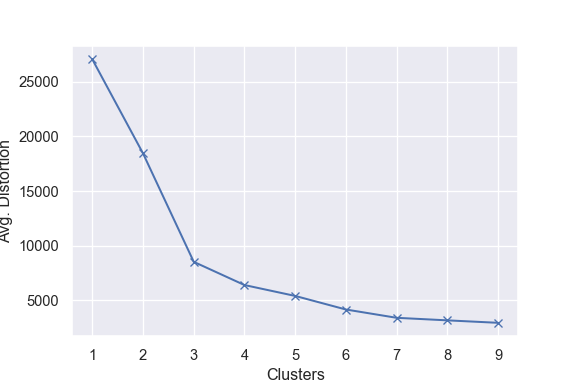

Text(0, 0.5, 'Avg. Distortion')

In [23]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(cc_data)
    prediction = model.predict(cc_data)
    meanDistortions.append(sum(np.min(cdist(cc_data, model.cluster_centers_, 'euclidean'), axis = 1)) / cc_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('Avg. Distortion')



#### We see the 'elbow' of the curve appear at 3 clusters.  This seems to line up with our above observation.  Between 3 and 6 clusters we don't see a significant improvement, and there is little if any noticable improvement above 6 clusters. 

#### Visualizing K-Means With 3 Clusters

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(cc_data_scaled)
centroids = kmeans.cluster_centers_
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [25]:
centroid_df = pd.DataFrame(centroids, columns = list(cc_data_scaled))
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


In [26]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
cc_data_labeled = cc_data.join(df_labels)
cc_data_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [27]:
cc_data_labeled['labels'].value_counts()  

1    386
0    224
2     50
Name: labels, dtype: int64

In [28]:
%matplotlib notebook

#### With 3 clusters we see the grouping as identified above, although there is a slight overlap along the cluster boundary. 

<IPython.core.display.Javascript object>


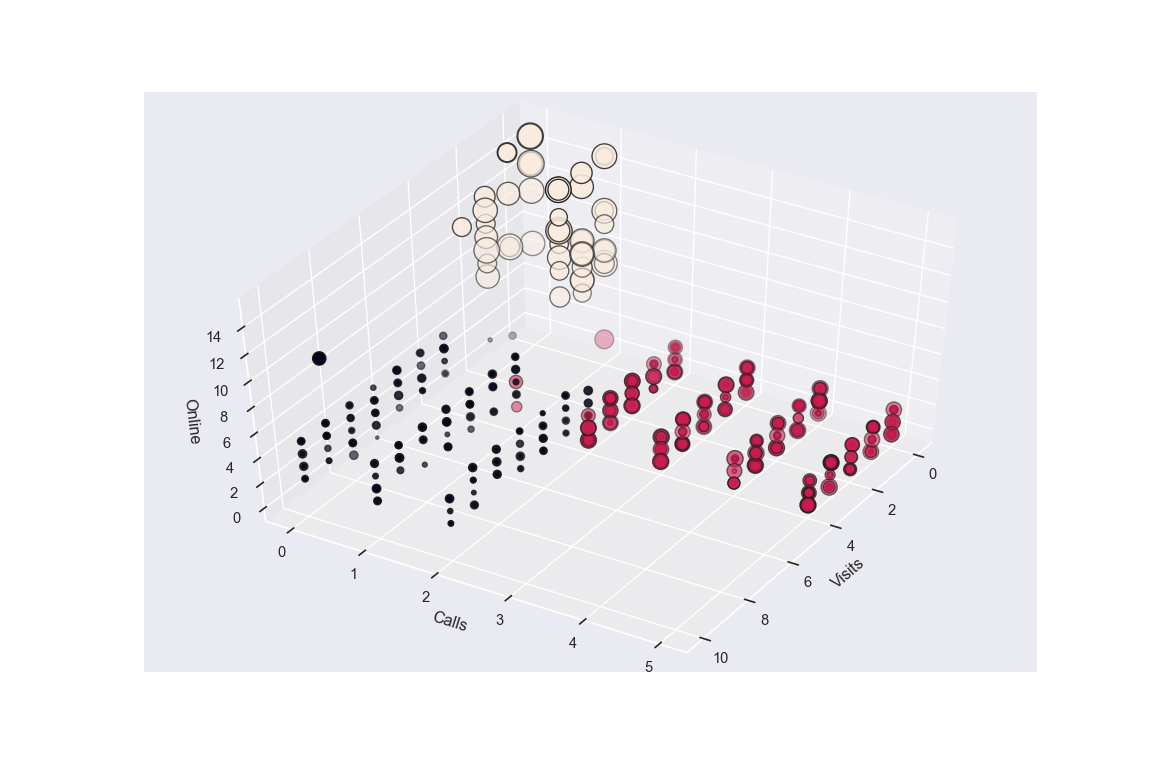

In [82]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')

x = cc_data['Total_calls_made']
y = cc_data['Total_visits_bank']
z = cc_data['Total_visits_online']

ax.set_xlabel('Visits')
ax.set_ylabel('Calls')
ax.set_zlabel('Online')

labels = kmeans.labels_
ax.scatter(x, y, z, s = [cc_data['Avg_Credit_Limit']/500], c = labels.astype(np.float), edgecolor = 'k')

plt.show()

#### We can see a fairly distinct seperation between our groups with 3 clusters in everything except 'Total_visits_bank'.

<IPython.core.display.Javascript object>


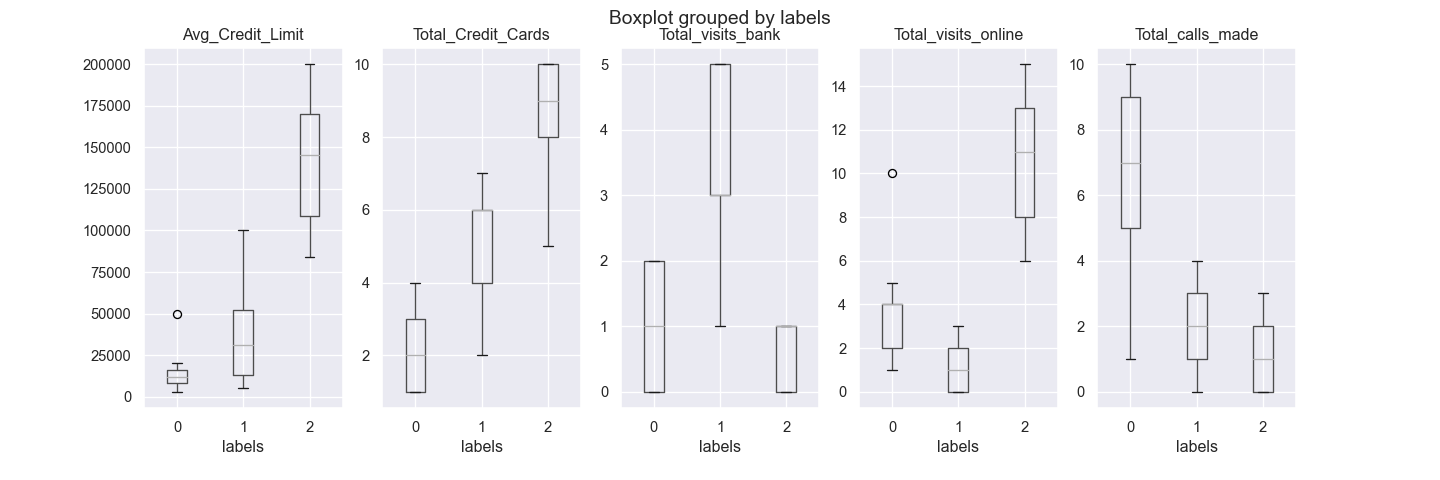

In [30]:
fig, ax= plt.subplots(1,5,figsize = (15,5))
ax1 = cc_data_labeled.boxplot(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'], 'labels', ax)

In [31]:
print('K-Means Silhouette Score With 3 Clusters:')
kmss_3 = silhouette_score(cc_data_scaled, labels)
kmss_3

K-Means Silhouette Score With 3 Clusters:


0.5157182558881063

#### Visualizing K-Means With 4 Clusters

In [32]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(cc_data_scaled)
centroids_2 = kmeans_4.cluster_centers_
centroids_2


array([[ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [ 0.03538264,  0.37695296,  0.04560145, -0.55776778, -0.52667828],
       [-0.08904777,  0.35679514,  1.29571325, -0.54390138, -0.5750638 ],
       [-0.59597409, -1.06749333, -0.904851  ,  0.33018588,  1.16645969]])

In [33]:
centroid_2_df = pd.DataFrame(centroids_2, columns = list(cc_data_scaled) )
print(centroid_2_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          2.831764            1.862226          -1.105763   
1          0.035383            0.376953           0.045601   
2         -0.089048            0.356795           1.295713   
3         -0.595974           -1.067493          -0.904851   

   Total_visits_online  Total_calls_made  
0             2.827319         -0.874330  
1            -0.557768         -0.526678  
2            -0.543901         -0.575064  
3             0.330186          1.166460  


In [34]:
df_labels_2 = pd.DataFrame(kmeans_4.labels_ , columns = list(['labels']))
df_labels_2['labels'] = df_labels_2['labels'].astype('category')
cc_data_labeled_2 = cc_data.join(df_labels_2)
cc_data_labeled_2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,3
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,0


In [35]:
cc_data_labeled_2['labels'].value_counts() 

3    221
1    199
2    190
0     50
Name: labels, dtype: int64

#### With 4 clusters we see a marked distinction within one of our previously unique clusters, but the slight overlap along boundaries is still apparent.

<IPython.core.display.Javascript object>


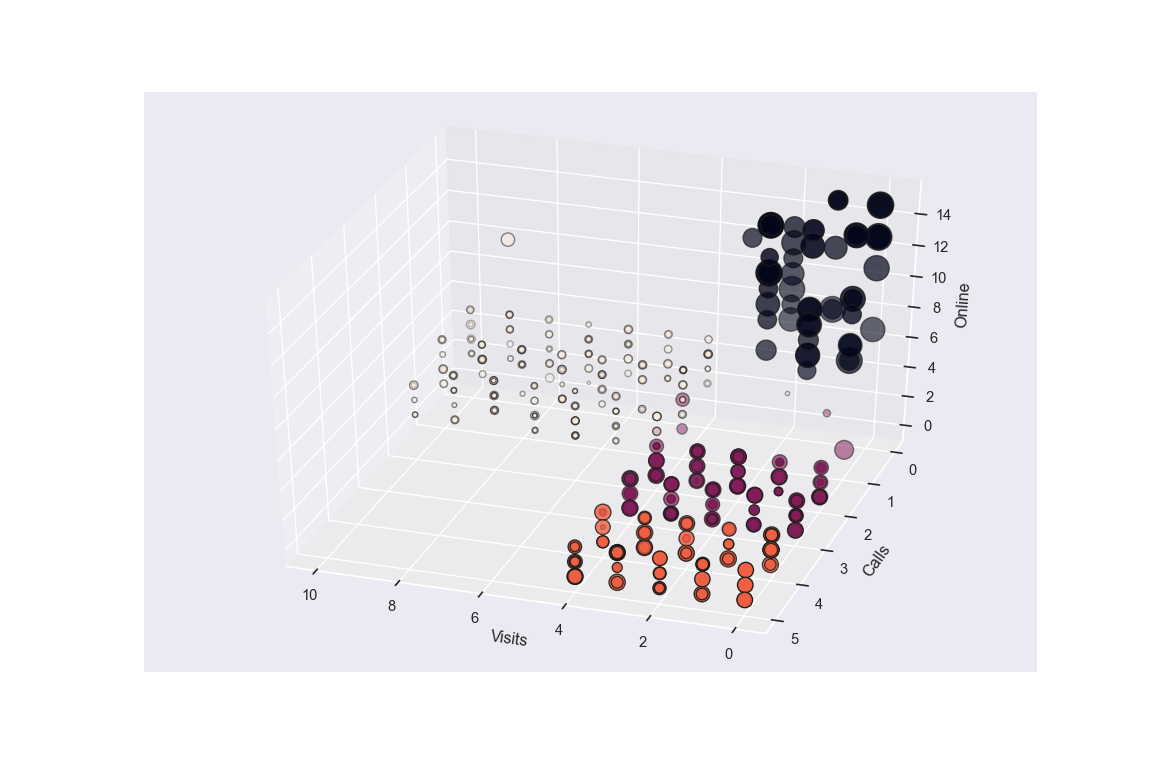

In [83]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')

x = cc_data['Total_calls_made']
y = cc_data['Total_visits_bank']
z = cc_data['Total_visits_online']

ax.set_ylabel('Calls')
ax.set_xlabel('Visits')
ax.set_zlabel('Online')

labels = kmeans_4.labels_
ax.scatter(x, y, z, s = [cc_data['Avg_Credit_Limit']/500], c = labels.astype(np.float), edgecolor = 'k')

In [37]:
%matplotlib auto

Using matplotlib backend: nbAgg


#### We can see much less seperation between our groups with 4 clusters.  Below we see them side by side and can easily understand why our 3 clusters have a higher silhouette score than 4 as they share a greater degree of similarity to each other.

<IPython.core.display.Javascript object>


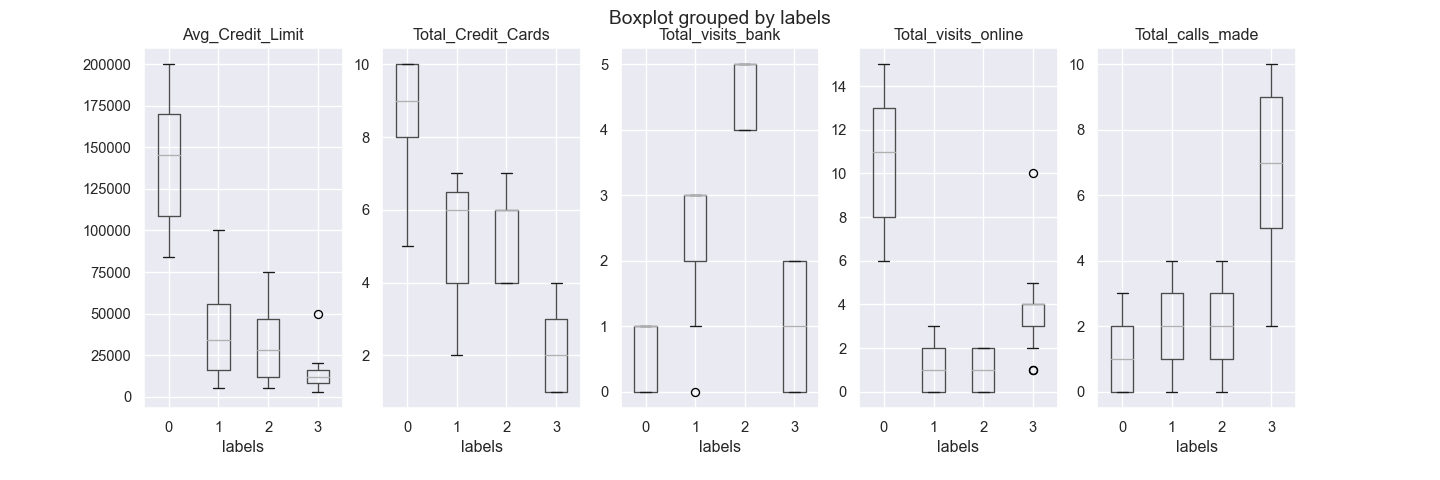

<IPython.core.display.Javascript object>


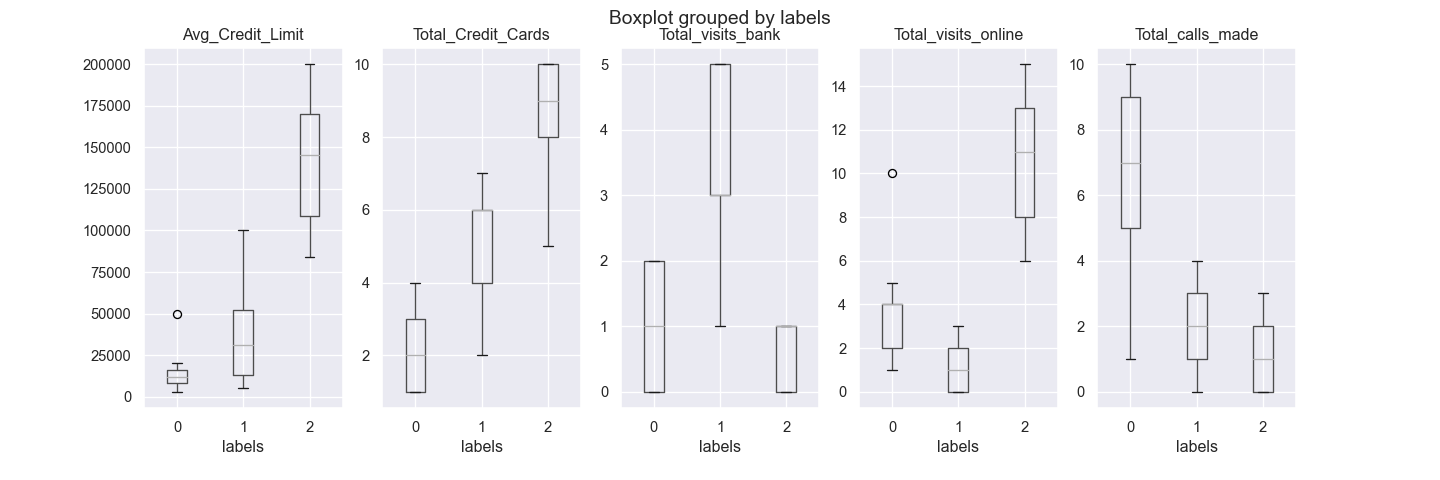

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8828e94d30>,
      dtype=object)

In [38]:
fig, ax1= plt.subplots(1,5,figsize = (15,5))
cc_data_labeled_2.boxplot(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'], 'labels', ax1)
fig, ax = plt.subplots(1,5,figsize = (15,5))
cc_data_labeled.boxplot(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'], 'labels', ax)
                           
                           

In [39]:
print('K-Means Silhouette Score With 4 Clusters:')
kmss_4 = silhouette_score(cc_data_scaled, labels)
kmss_4

K-Means Silhouette Score With 4 Clusters:


0.3556670619372605

#### We are primarily concerned with finding the better choice between 3 and 4 clusters, let's create a variey of linkages to find their cophenetic and silhouette scores

In [40]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
Z = linkage(cc_data_scaled, 'ward', metric='euclidean')
Y = linkage(cc_data_scaled, 'average', metric='euclidean')
V = linkage(cc_data_scaled, 'centroid', metric='euclidean')
U = linkage(cc_data_scaled, 'complete', metric='euclidean')
Z.shape, Y.shape, V.shape, U.shape

((659, 4), (659, 4), (659, 4), (659, 4))

In [41]:
Z

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

In [42]:
%matplotlib auto

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


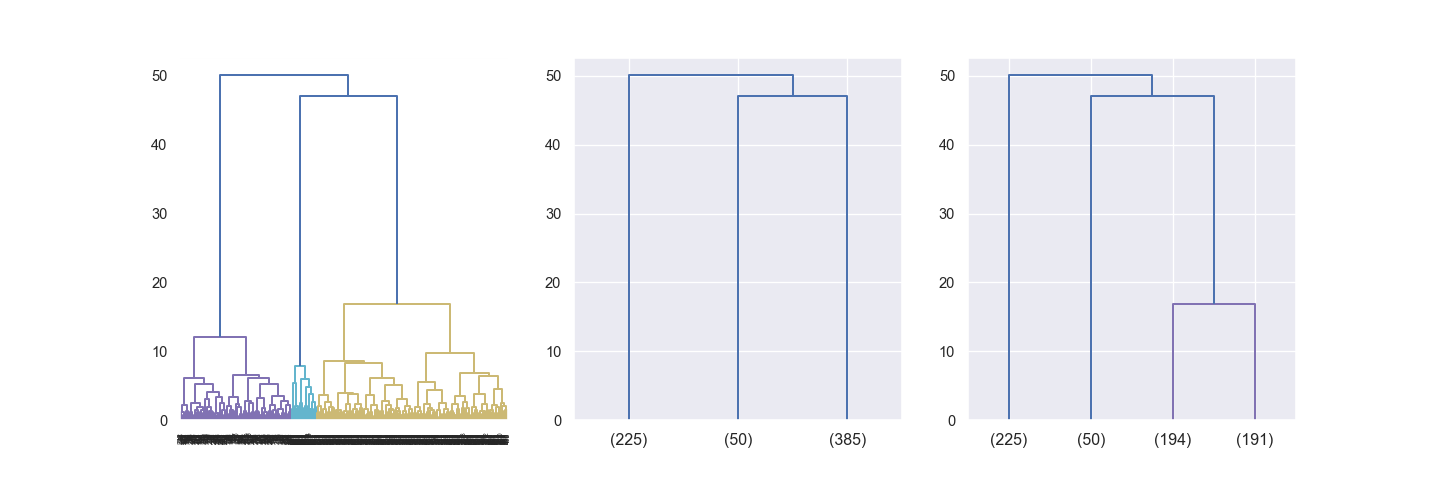

In [43]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'b'])
fig, axes = plt.subplots(1,3,figsize = (15,5))
dn1 = dendrogram(Z, ax = axes[0])
dn2 = dendrogram(Z, ax = axes[1], truncate_mode = 'lastp', p = 3)
dn3 = dendrogram(Z, ax = axes[2], truncate_mode = 'lastp', p = 4)
hierarchy.set_link_color_palette(None)

#### There seems to be a distinct subclustering between steps 3 & 4. Given the depth of this additional cluster, it calls into question the significance of this distinction.

In [44]:
c, coph_dist = cophenet(Z, pdist(cc_data_scaled))
c

0.7415156284827493

In [45]:
clusters_Z1 = fcluster(Z, 40, criterion = 'distance')
ss_1 = silhouette_score(cc_data_scaled, clusters_Z1)
clusters_Z2 = fcluster(Z, 15, criterion = 'distance')
ss_2 = silhouette_score(cc_data_scaled, clusters_Z2)

In [46]:
ss_1, ss_2

(0.5147639589977819, 0.3480822581261928)

<IPython.core.display.Javascript object>


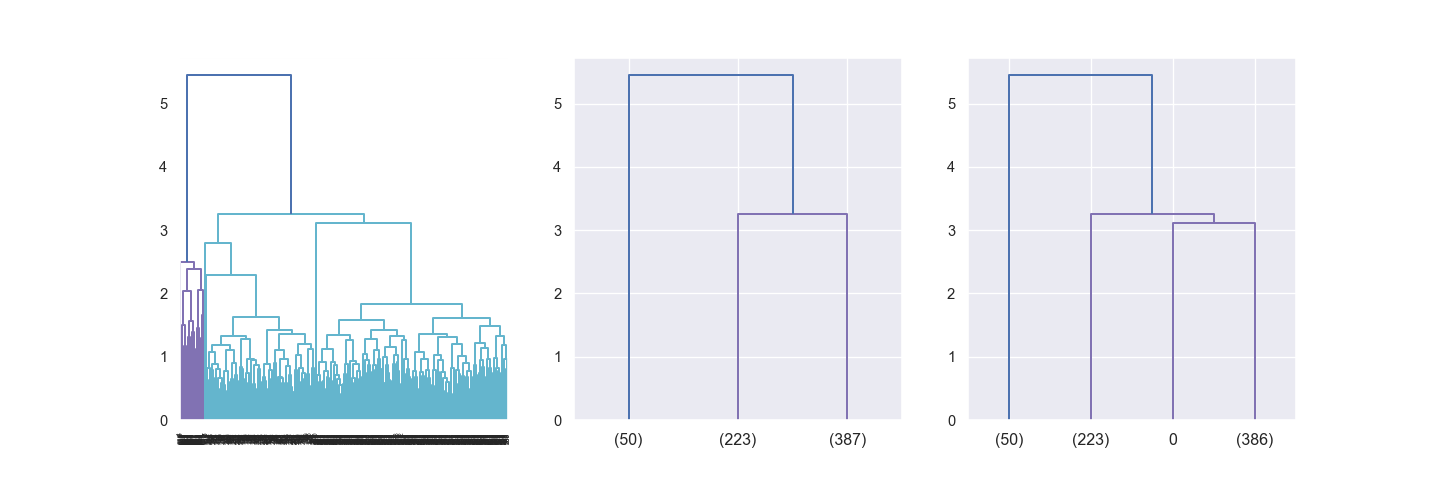

In [47]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'b'])
fig, axes = plt.subplots(1,3,figsize = (15,5))
dn1 = dendrogram(Y, ax = axes[0])
dn2 = dendrogram(Y, ax = axes[1], truncate_mode = 'lastp', p = 3)
dn3 = dendrogram(Y, ax = axes[2], truncate_mode = 'lastp', p = 4)
hierarchy.set_link_color_palette(None)

#### We observe no apparent help from a fourth cluster in relation to using the Average method of linkage.

In [48]:
d, coph_dist = cophenet(Y, pdist(cc_data_scaled))
d

0.8977080867389372

In [49]:
clusters_Y1 = fcluster(Y, 3.2, criterion = 'distance')
ss_3 = silhouette_score(cc_data_scaled, clusters_Y1)
clusters_Y2 = fcluster(Y, 3, criterion = 'distance')
ss_4 = silhouette_score(cc_data_scaled, clusters_Y2)

In [50]:
ss_3, ss_4

(0.515922432650965, 0.47495143595793504)

<IPython.core.display.Javascript object>


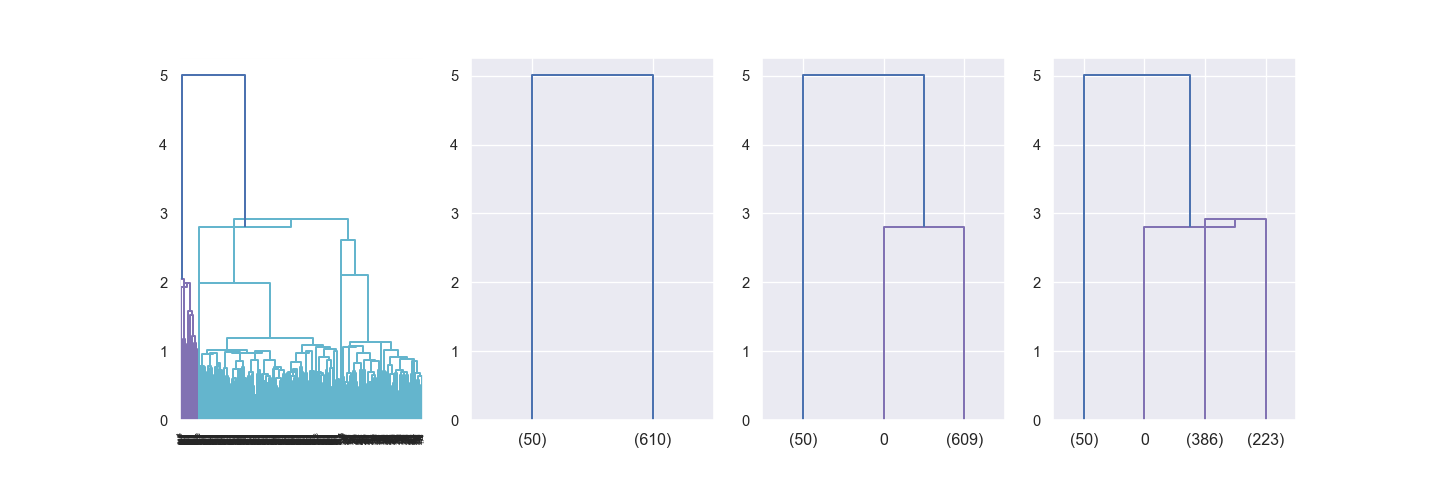

In [51]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'b'])
fig, axes = plt.subplots(1,4,figsize = (15,5))
dn1 = dendrogram(V, ax = axes[0])
dn2 = dendrogram(V, ax = axes[1], truncate_mode = 'lastp', p = 2)
dn3 = dendrogram(V, ax = axes[2], truncate_mode = 'lastp', p = 3)
dn4 = dendrogram(V, ax = axes[3], truncate_mode = 'lastp', p = 4)
hierarchy.set_link_color_palette(None)

#### There seems to be a negligent disctinction between 2 & 3 clusters, but there is a distinction between 3 & 4 clusters. Given the immediacy of depth of this additional cluster, it calls into question the significance of this distinction.

In [52]:
e, coph_dist = cophenet(V, pdist(cc_data_scaled))
e

0.8939385846326323

In [53]:
clusters_V1 = fcluster(V, 5, criterion = 'distance')
ss_5 = silhouette_score(cc_data_scaled, clusters_V1)
clusters_V2 = fcluster(V, 2.8, criterion = 'distance')
ss_6 = silhouette_score(cc_data_scaled, clusters_V2)
clusters_V2 = fcluster(V, 2.5, criterion = 'distance')
ss_7 = silhouette_score(cc_data_scaled, clusters_V2)

In [54]:
ss_5, ss_6, ss_7

(0.5703183487340514, 0.47495143595793504, 0.44039753024783956)

<IPython.core.display.Javascript object>


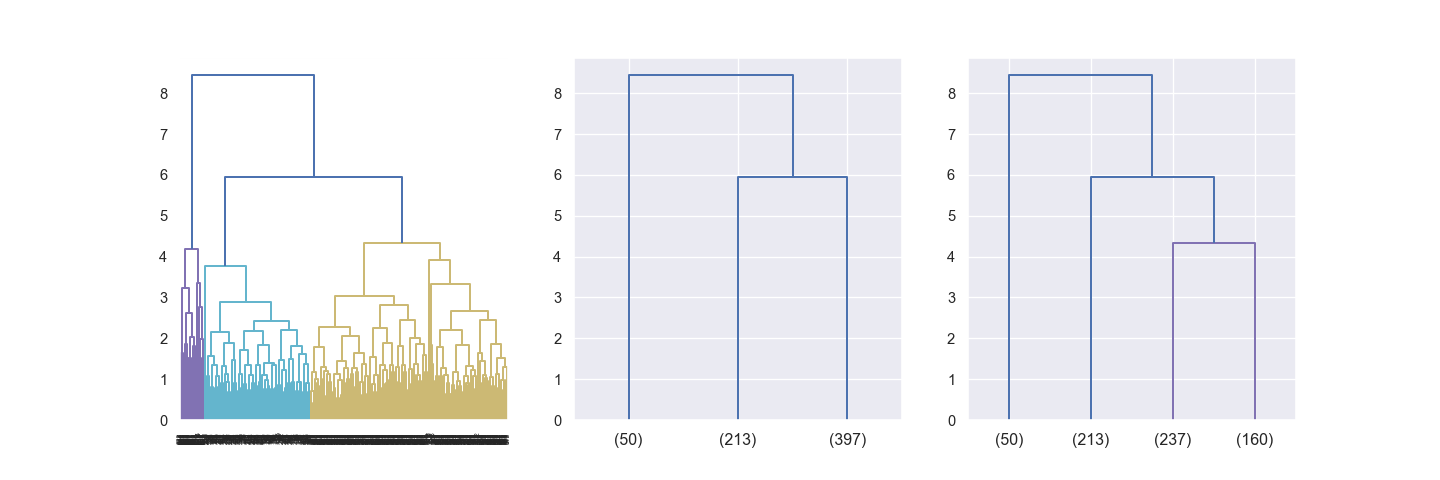

In [55]:
hierarchy.set_link_color_palette(['m', 'c', 'y', 'b'])
fig, axes = plt.subplots(1,3,figsize = (15,5))
dn1 = dendrogram(U, ax = axes[0])
dn2 = dendrogram(U, ax = axes[1], truncate_mode = 'lastp', p = 3)
dn3 = dendrogram(U, ax = axes[2], truncate_mode = 'lastp', p = 4)
hierarchy.set_link_color_palette(None)

#### There seems to be a distinct subclustering between steps 3 & 4. Given the depth of this additional cluster, it calls into question the significance of this distinction.

In [59]:
f, coph_dist = cophenet(U, pdist(cc_data_scaled))
f

0.8599730607972423

In [60]:
clusters_U1 = fcluster(U, 5, criterion = 'distance')
ss_8 = silhouette_score(cc_data_scaled, clusters_U1)
clusters_U2 = fcluster(U, 4, criterion = 'distance')
ss_9 = silhouette_score(cc_data_scaled, clusters_U2)

In [61]:
ss_8, ss_9

(0.5026435522438492, 0.2795859403678087)

In [62]:
kmc_sscores = {
    'Method':['K-Means 3 Clusters', 'K-Means 4 Clusters', 'Avg.Score'],
    'Score':[kmss_3, kmss_4, ((kmss_3 + kmss_4)/2)]
}

hc_sscores = {
    'Method':['HC_Ward_3', 'HC_Ward_4', 'HC_Avg_3', 'HC_Avg_4', 'HC_Centroid_2', 'HC_Centroid_3', 'HC_Centroid_4', 'HC_Complete_3', 'HC_Complete_4', 'HC_Average'],
    'Score':[ss_1, ss_2, ss_3, ss_4, ss_5, ss_6, ss_7, ss_8, ss_9, ((ss_1 + ss_2 + ss_3 + ss_4 + ss_5 + ss_6 + ss_7 + ss_8 + ss_9)/9)]
}

In [63]:
kmc_sscores_df = pd.DataFrame(kmc_sscores)
hc_sscores_df = pd.DataFrame(hc_sscores)

#### Silhouette Scores

In [64]:
kmc_sscores_df

,Method,Score
0,K-Means 3 Clusters,0.515718
1,K-Means 4 Clusters,0.355667
2,Avg.Score,0.435693


In [65]:
hc_sscores_df

,Method,Score
0,HC_Ward_3,0.514764
1,HC_Ward_4,0.348082
2,HC_Avg_3,0.515922
3,HC_Avg_4,0.474951
4,HC_Centroid_2,0.570318
5,HC_Centroid_3,0.474951
6,HC_Centroid_4,0.440398
7,HC_Complete_3,0.502644
8,HC_Complete_4,0.279586
9,HC_Average,0.457957


#### Cophenetic Scores

In [66]:
c_scores = {
    'Method':['Ward', 'Average', 'Centroid', 'Complete'],
    'Score':[c, d, e, f]
}
c_scores_df = pd.DataFrame(c_scores)
c_scores_df

,Method,Score
0,Ward,0.741516
1,Average,0.897708
2,Centroid,0.893939
3,Complete,0.859973


### It appears that the average Euclidian linkage with 3 clusters gives us the best results.

### PCA Approach

#### Let's approach distinct clustering between 3 & 4 clusters utilizing PCA

In [67]:
from sklearn.cluster import AgglomerativeClustering
h_cluster = AgglomerativeClustering(affinity = 'euclidean', linkage = 'average', compute_full_tree = True)
h_cluster.set_params(n_clusters=3)
h_clusters = h_cluster.fit_predict(cc_data_scaled) 
np.bincount(h_clusters)

array([387,  50, 223])

In [68]:
cc_data_scaled_clustered = pd.DataFrame(cc_data_scaled, columns=cc_data.columns, index=cc_data.index)
cc_data_scaled_clustered['cluster'] = h_clusters
cc_data_scaled_clustered.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


#### We have the same groupling of labels as above

In [69]:
cc_data_scaled_clustered['cluster'].value_counts()

0    387
2    223
1     50
Name: cluster, dtype: int64

In [70]:
h_cluster_2 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', compute_full_tree = True)
h_cluster_2.set_params(n_clusters=4)
h_clusters_2 = h_cluster_2.fit_predict(cc_data_scaled) 
np.bincount(h_clusters_2)

array([223, 196,  50, 191])

In [71]:
cc_data_scaled_clustered_2 = pd.DataFrame(cc_data_scaled, columns=cc_data.columns, index=cc_data.index)
cc_data_scaled_clustered_2['cluster'] = h_clusters_2

cc_data_scaled_clustered_2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


#### We have the same groupling of labels as above

In [72]:
cc_data_scaled_clustered_2['cluster'].value_counts()

0    223
1    196
3    191
2     50
Name: cluster, dtype: int64

In [73]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(cc_data_scaled)
pca_cc_data_scaled = pca.transform(cc_data_scaled)

In [74]:
pca_cc_data_scaled_df = pd.DataFrame(pca_cc_data_scaled, index = cc_data.index, columns = ['PCA_1', 'PCA_2', 'PCA_3'])
pca_cc_data_scaled_df['cluster'] = h_clusters
pca_cc_data_scaled_df.head()

,PCA_1,PCA_2,PCA_3,cluster
0,-0.588075,0.585397,1.919437,0
1,2.919149,2.116533,-0.863630,2
2,-0.496476,0.853946,0.206652,0
3,-0.060088,-0.183095,0.669411,0
4,0.492920,3.807755,-0.082906,1


In [75]:
%matplotlib notebook

#### We see 3 extremely distinct clusters with our PCA approach.

<IPython.core.display.Javascript object>


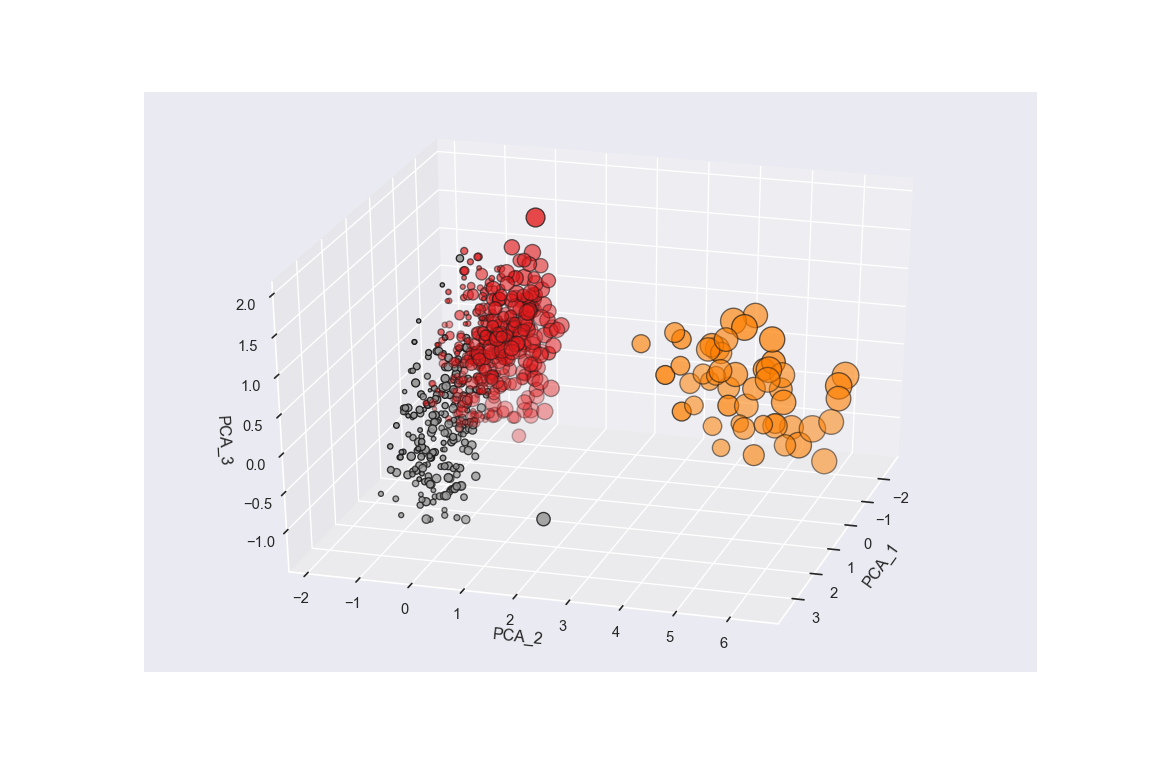

In [84]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

ax.scatter(pca_cc_data_scaled[:, 0], pca_cc_data_scaled[:, 1], pca_cc_data_scaled[:, 2], c = h_clusters.astype(np.float), cmap = 'Set1', s = [cc_data['Avg_Credit_Limit']/500], edgecolor='k')


#### We see 2 very distinct and 2 very blurred clusters when approaching PCA with 4 clusters.

<IPython.core.display.Javascript object>


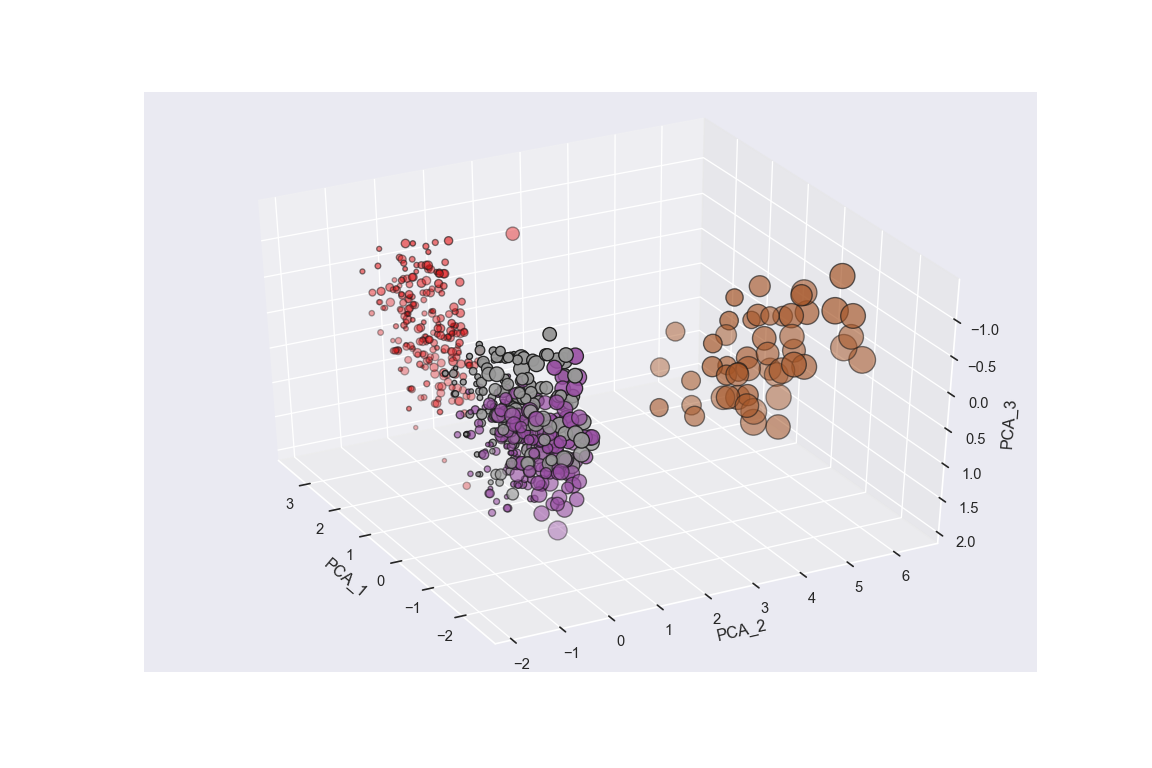

In [85]:
fig = plt.figure(figsize = [12,8])
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('PCA_1')
ax.set_ylabel('PCA_2')
ax.set_zlabel('PCA_3')

ax.scatter(pca_cc_data_scaled[:, 0], pca_cc_data_scaled[:, 1], pca_cc_data_scaled[:, 2], c = h_clusters_2.astype(np.float), cmap = 'Set1', s = [cc_data['Avg_Credit_Limit']/500], edgecolor='k')


#### For the sake of demonstration, we've used 3 dimensions and as such, our third PCA dimension shows litte separation.

<IPython.core.display.Javascript object>


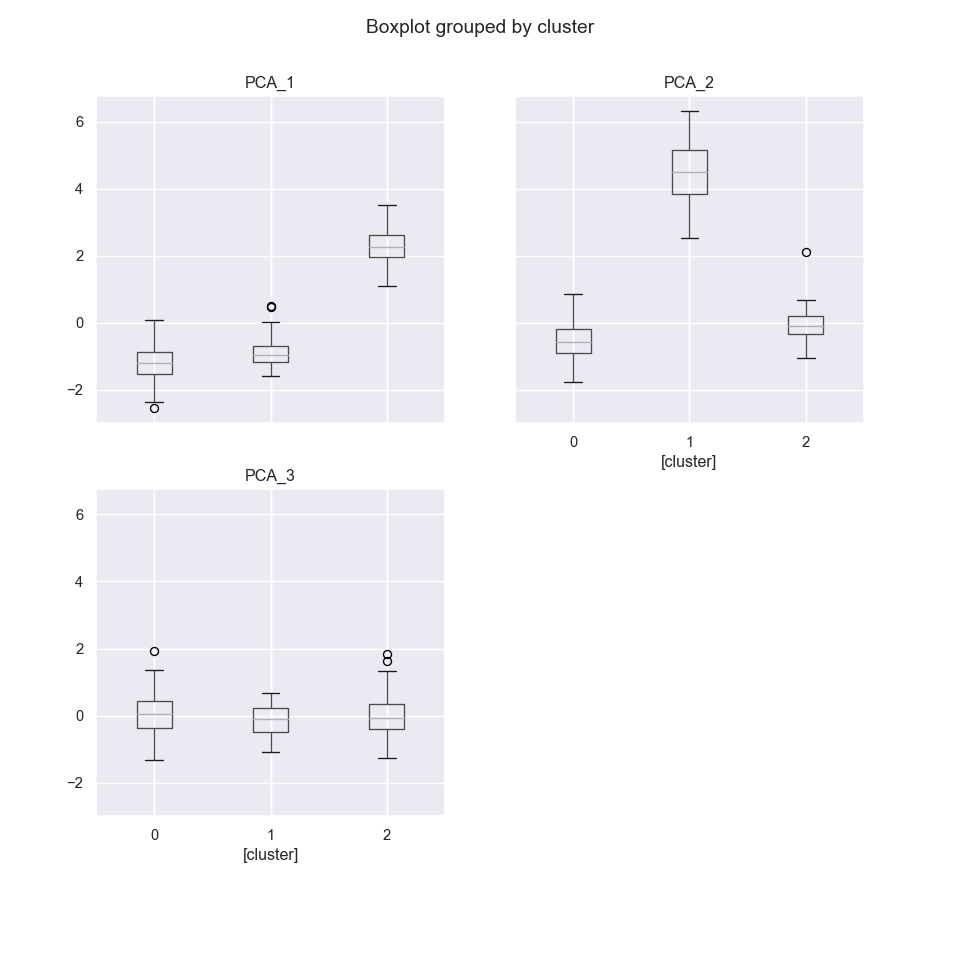

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88110f20d0>,
      dtype=object)

In [78]:
pca_cc_data_scaled_df.boxplot(by = 'cluster', figsize = (10,10))

## Conclusions:

### It is clear that 3 segments of customers provide us with the most well defined clustering of the data. While it could be argued that 4 clusters would give more definition and/or reach to specific customers, the potential for error in distinguishing this boundary and confusing our aims is greater. 

### The goal we are seeking is not only to identify our customers correctly, but also to provide and engender an enviornment that allows the customer to accomplish their needs quickly and efficiently. 

### This enviornment is showcased in the group that utilizes online visits, and tends not to favor calling the bank or visiting in person.  The latter method being one that expends resources far greater, for both the bank and the customer in time and energy. 

### Instead of trying to distinguish the fineness between grains of sand, our goal should be moving the larger needle from one direction to the other, grasping for the shells along the beach.

### Not only do we see that customers who have a larger credit line prefer not to visit the bank in person, they also spend less time on the phone, potentially waiting to talk to someone in order to conduct their business.  That should be all the incentive needed in order to identify where it is that improvements need to happen.  The more power that our customers have to spend on their credit, the more the bank is able to grow.

### It would be in our best interest to educate and reach out to the customers who regularly come into the bank in person and/or call more than twice, about the ease of conducting business online.  It may be beneficial to offer credit cards to them specifically with rewards that favor utilizing these online resources in the form of greater spending capacities.